In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [15]:
data = pd.read_csv('data.csv').dropna()
data.head()

,CODUSU,NRO_HOGAR,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,CH03,...,II1,II2,II7,IX_TOT,IX_MEN10,IX_MAYEQ10,ITF,DECIFR,V11,dropped
95,TQRMNOTRPHJORSCDEIJAH00663228,1,1,2021,2,1,S,33,8647,1,...,4,1,1,1,0,1,32000,2,2,0
247,TQRMNOSSVHLMLLCDEGKDB00708304,1,1,2021,2,43,N,14,111,2,...,2,1,3,4,2,2,29000,2,2,0
248,TQRMNOSSVHLMLLCDEGKDB00708304,1,1,2021,2,43,N,14,111,2,...,2,1,3,4,2,2,29000,2,2,0
249,TQRMNOSSVHLMLLCDEGKDB00708304,1,1,2021,2,43,N,14,111,2,...,2,1,3,4,2,2,29000,2,2,0
250,TQRMNOSSVHLMLLCDEGKDB00708304,1,1,2021,2,43,N,14,111,2,...,2,1,3,4,2,2,29000,2,2,0


In [16]:
data.columns

Index(['CODUSU', 'NRO_HOGAR', 'H15', 'ANO4', 'TRIMESTRE', 'REGION', 'MAS_500',
       'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07', 'CH08',
       'CH09', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'NIVEL_ED',
       'CAT_OCUP', 'CAT_INAC', 'P47T', 'DECINDR', 'PONDII', 'V11_M',
       'REALIZADA', 'IV4', 'IV9', 'II1', 'II2', 'II7', 'IX_TOT', 'IX_MEN10',
       'IX_MAYEQ10', 'ITF', 'DECIFR', 'V11', 'dropped'],
      dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4403 entries, 95 to 79143
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODUSU      4403 non-null   object 
 1   NRO_HOGAR   4403 non-null   int64  
 2   H15         4403 non-null   int64  
 3   ANO4        4403 non-null   int64  
 4   TRIMESTRE   4403 non-null   int64  
 5   REGION      4403 non-null   int64  
 6   MAS_500     4403 non-null   object 
 7   AGLOMERADO  4403 non-null   int64  
 8   PONDERA     4403 non-null   int64  
 9   CH03        4403 non-null   int64  
 10  CH04        4403 non-null   int64  
 11  CH05        4403 non-null   object 
 12  CH06        4403 non-null   int64  
 13  CH07        4403 non-null   int64  
 14  CH08        4403 non-null   int64  
 15  CH09        4403 non-null   int64  
 16  CH11        4403 non-null   int64  
 17  CH12        4403 non-null   int64  
 18  CH13        4403 non-null   int64  
 19  CH14        4403 non-null

In [18]:
X = data.drop(['CODUSU', 'NRO_HOGAR', 'H15', 'ANO4', 'TRIMESTRE', 'PONDERA', 'PONDII', 'dropped', 'CH05', 'MAS_500'], axis=1)
y = data['dropped']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1089
           1       0.32      0.29      0.31       232

    accuracy                           0.77      1321
   macro avg       0.59      0.58      0.58      1321
weighted avg       0.76      0.77      0.76      1321



In [22]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

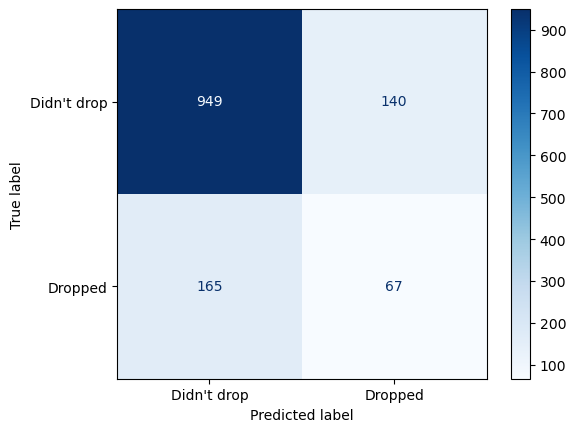

In [25]:
disp = ConfusionMatrixDisplay.from_estimator(
        rfc,
        X_test,
        y_test,
        display_labels=['Didn\'t drop', 'Dropped'],
        cmap=plt.cm.Blues);
disp